### CSC 578 Final Project
##### Student: Serena Yang

### Problem
The goal of this project is to predict from a 5-hour input window, only the traffic volume for 2 hours past the end of the window. 

### Source
**[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)**

For this project, the dataset is a subset of the Metro Interstate traffic volumn which is locate in Minnesota, between Minneapolis and St Paul, from the UCI repository, includes 40+ thousand rows and 9 features. 

### Packages

In [1]:
#These packages will be used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import IPython
import IPython.display

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models, optimizers

import warnings
warnings.filterwarnings("ignore")

### Data Preparation

In [2]:
path = '/Users/serenayang/Desktop/csc578 - Neural Networks & DL/final project/'

In [3]:
df = pd.read_csv(path + 'Metro_Interstate_Traffic_Volume.csv')

In [4]:
#There are 9 features for this dataset:
# holiday: string (None or name of holiday)
# temp: in degrees kelvin
# rain_1h: in mm for the last hour
# snow_1h: in mm for the last hour
# clouds: percent
# weather_main: short descriptive text
# weather_description: longer descriptive text
# date_time: in M/D/Y H:m:s AM/PM format
# traffic_volume: # of cars in the last hour
    
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
#drop the date_time from the df table and save as an new variable
date_time = pd.to_datetime(df.pop('date_time'), format='%Y.%m.%d %H:%M:%S')

In [6]:
date_time

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [7]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


### EDA

In [8]:
#current dataset includes 48204 rows and 8 features(already drop 'date_time')
df.shape

(48204, 8)

In [9]:
#there is no missing data
df.isnull().values.any()

False

In [10]:
# 5 numerical variables and 4 categorical(string) variables
df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
traffic_volume           int64
dtype: object

#### Categorical variables
Lets start with categorical variables:

In [11]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

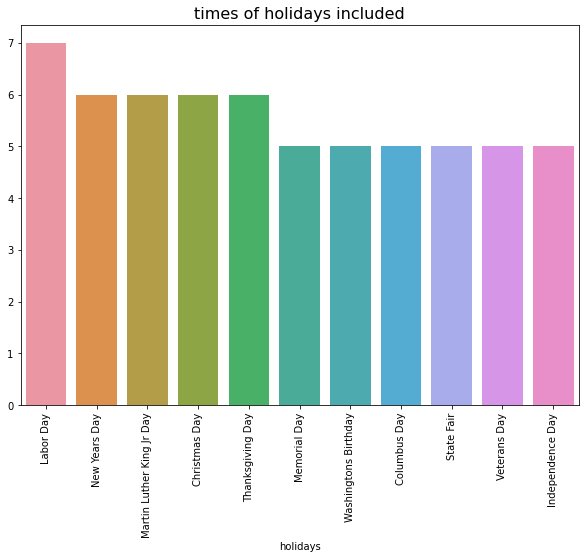

In [12]:
plt.figure(figsize = (10,7))
sns.barplot(data=df, x=list(df['holiday'].value_counts().index)[1::], y=list(df['holiday'].value_counts())[1::])
#sns.set_style("whitegrid")
plt.xticks(rotation = 90)
plt.xlabel('holidays')
plt.title('times of holidays included', fontsize = 16)
plt.show() 

for holiday column, there are 12 different values.   
##### In the dataset, expect 'None' value：
'Labor Day' shows 7 times;  
'Martin Luther King Jr Day','Christmas Day','Thanksgiving Day','New Years Day' shows 6 times;  
'State Fair', 'Memorial Day', 'Indeoendence Day', 'Columbus Day', 'Washingtons Birthday','Veterans Day' shows 5 times.  

In [13]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

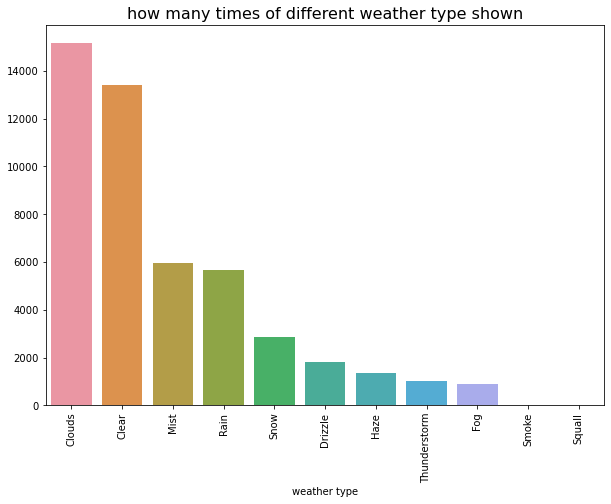

In [14]:
plt.figure(figsize = (10,7))
sns.barplot(data=df, x=list(df['weather_main'].value_counts().index), y=list(df['weather_main'].value_counts()))
plt.xticks(rotation = 90)
plt.xlabel('weather type')
plt.title('how many times of different weather type shown', fontsize = 16)
plt.show()


There are 11 unique values in 'weather_main' feature. Most days are 'Clouds' and 'Clear,' and 'Smoke' and 'Squall' barely happen.

In [15]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

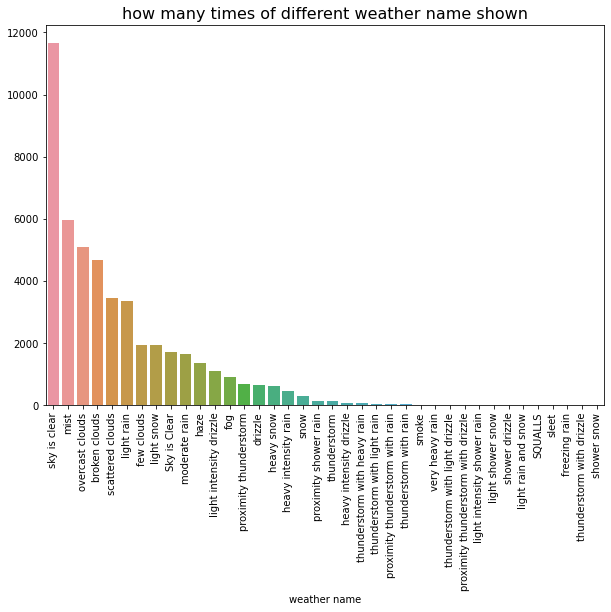

In [16]:
plt.figure(figsize = (10,7))
sns.barplot(data=df, x=list(df['weather_description'].value_counts().index), y=list(df['weather_description'].value_counts()))
plt.xticks(rotation = 90)
plt.xlabel('weather name')
plt.title('how many times of different weather name shown', fontsize = 16)
plt.show()

There are 38 unique values in 'weather_description' feature. Most weather is 'sky is clear,' and a lot of weather descriptions barely happened. 

#### Numerical variables

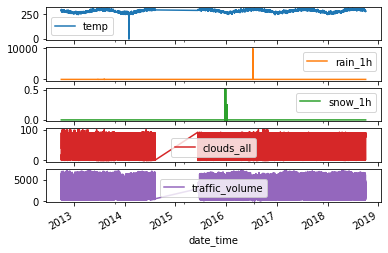

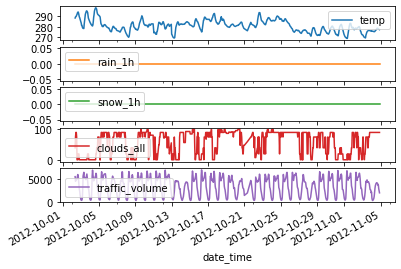

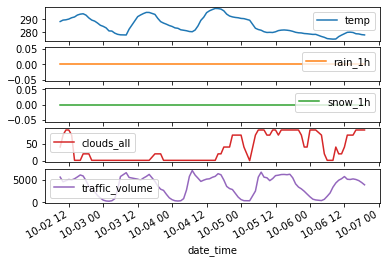

In [17]:
#From TF Tutorial
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:900]
plot_features.index = date_time[:900]
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:100]
plot_features.index = date_time[:100]
_ = plot_features.plot(subplots=True)

There are five cycles from 2012 to 2018 and a gap from 2015 to 2016. The temperature is overall decreasing. For the rain_1h and snow_1h have barely happened.

In [18]:
# statistics of the numerical dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


#### Time
#From TF Tutorial

In [19]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [20]:
# Lets convert the Date Time to seconds, daily and yearly periodicity.
# get usable signals by using sine and cos transformas to clear "Time of day" and "Time of year" signals.
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

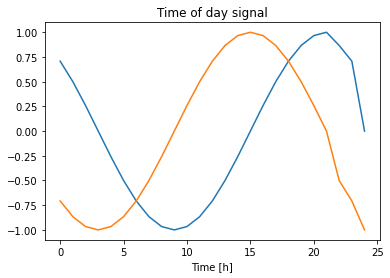

In [21]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

From the frequency features, we can know ahead of time which frequencies were important.

In [22]:
#current datset
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Day sin,Day cos,Year sin,Year cos
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,7.071068e-01,-0.707107,-0.999766,0.021642
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,5.000000e-01,-0.866025,-0.999750,0.022358
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2.588190e-01,-0.965926,-0.999734,0.023075
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,1.143105e-11,-1.000000,-0.999717,0.023791
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,-2.588190e-01,-0.965926,-0.999700,0.024508


### select final variables

In [23]:
#drop 'weather_description', since it high correlate to 'weather_main'
df = df.drop(columns = ['weather_description'])

In [24]:
# convert variables 'holiday' and 'weather_main' into dummy variables
df = pd.get_dummies(df, columns = ['holiday','weather_main'])

In [25]:
df.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day sin,Day cos,Year sin,Year cos,holiday_Christmas Day,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,288.28,0.0,0.0,40,5545,7.071068e-01,-0.707107,-0.999766,0.021642,0,...,1,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,75,4516,5.000000e-01,-0.866025,-0.999750,0.022358,0,...,1,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,4767,2.588190e-01,-0.965926,-0.999734,0.023075,0,...,1,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,5026,1.143105e-11,-1.000000,-0.999717,0.023791,0,...,1,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,75,4918,-2.588190e-01,-0.965926,-0.999700,0.024508,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(48204, 32)

### split the data
Split the data into:   
training: 70%  
validation: about 20%  
test: 5000 records

In [27]:
# From TF Tutorial
column_indices = {name: i for i, name in enumerate(df.columns)}
n = len(df) - 5000

train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):n]
test_df = df[n:]

num_features = df.shape[1]

In [28]:
print('train_df:', train_df.shape)
print('val_df:', val_df.shape)
print('test_df:', test_df.shape)

train_df: (34563, 32)
val_df: (8641, 32)
test_df: (5000, 32)


### Normalize the data
From TF Tutorial

In [29]:
train_mean = train_df.mean()
train_std = train_df.std()

#convert the prediction result back for later use
train_volumn_mean = train_df['traffic_volume'].mean()
train_volumn_std = train_df['traffic_volume'].std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [30]:
train_df.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day sin,Day cos,Year sin,Year cos,holiday_Christmas Day,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,0.595124,-0.008284,-0.03216,-0.265706,1.157717,0.979774,-1.013411,-1.537450,0.003435,-0.012028,...,1.421776,-0.195068,-0.130526,-0.164531,-0.367772,-0.364978,-0.022183,-0.252397,-0.010758,-0.130296
1,0.675784,-0.008284,-0.03216,0.634376,0.640601,0.687154,-1.238418,-1.537427,0.004434,-0.012028,...,1.421776,-0.195068,-0.130526,-0.164531,-0.367772,-0.364978,-0.022183,-0.252397,-0.010758,-0.130296
2,0.692215,-0.008284,-0.03216,1.020125,0.766739,0.346391,-1.379864,-1.537403,0.005434,-0.012028,...,1.421776,-0.195068,-0.130526,-0.164531,-0.367772,-0.364978,-0.022183,-0.252397,-0.010758,-0.130296
3,0.733292,-0.008284,-0.03216,1.020125,0.896897,-0.019293,-1.428108,-1.537379,0.006433,-0.012028,...,1.421776,-0.195068,-0.130526,-0.164531,-0.367772,-0.364978,-0.022183,-0.252397,-0.010758,-0.130296
4,0.808724,-0.008284,-0.03216,0.634376,0.842623,-0.384977,-1.379864,-1.537354,0.007433,-0.012028,...,1.421776,-0.195068,-0.130526,-0.164531,-0.367772,-0.364978,-0.022183,-0.252397,-0.010758,-0.130296


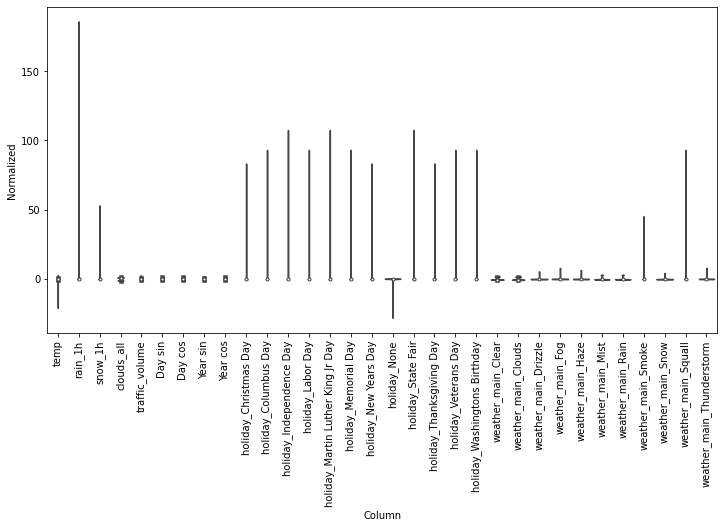

In [31]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Data Windowing
From TF Tutorial

I did the windowGnerator for input width(5-hour input window in this project), and offset = 3 and label width = 1(2 hours past the end of the window).

#From TF Tutorial   
The main features of the input windows are:
The width (number of time steps) of the input and label windows.
The time offset between them.
Which features are used as inputs, labels, or both.

##### 1. Indexes and offsets
Found the window size, input indices, label indices by using the WindowGenerator function.

In [32]:
class WindowGenerator():
    
    #includes all the necessary logic for the input and label indices.
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [33]:
#test for this project case
window_5_1_2 = WindowGenerator(input_width=5, label_width=1, shift=2,
                     label_columns=['traffic_volume'])
window_5_1_2

Total window size: 7
Input indices: [0 1 2 3 4]
Label indices: [6]
Label column name(s): ['traffic_volume']

##### 2. Split
Given the consecutive inputs to get labels by using split_window function.

In [34]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [35]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:window_5_1_2.total_window_size]),
                           np.array(train_df[100:100+window_5_1_2.total_window_size]),
                           np.array(train_df[200:200+window_5_1_2.total_window_size])])

example_inputs, example_labels = window_5_1_2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 32)
Inputs shape: (3, 5, 32)
Labels shape: (3, 1, 1)


##### 3. Plot
Show the plot of 5 input traffic_volumes and the label traffic_volume by using plot function.

In [36]:
window_5_1_2.example = example_inputs, example_labels

In [37]:
# I have changed the label from the tutorial 1 into 2.
def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 2, n+2)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

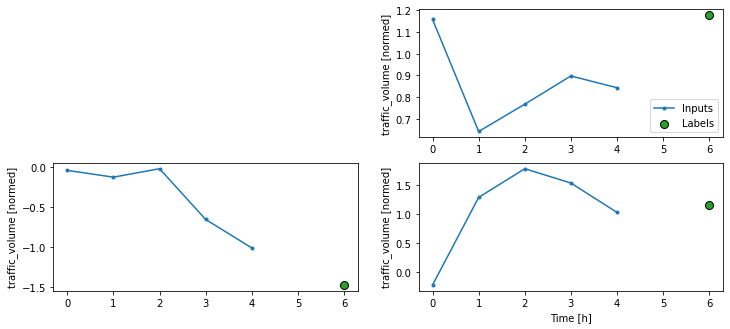

In [38]:
window_5_1_2.plot()

##### 4. Create tf.data.Datasets

Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function:

In [39]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

The WindowGenerator object holds training, validation, and test data.

Add properties for accessing them as tf.data.Datasets using the make_dataset method you defined earlier. Also, add a standard example batch for easy access and plotting:

In [40]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Now, the WindowGenerator object gives you access to the tf.data.Dataset objects, so you can easily iterate over the data.

The Dataset.element_spec property tells you the structure, data types, and shapes of the dataset elements.

In [41]:
# Each element is an (inputs, label) pair.
window_5_1_2.train.element_spec

(TensorSpec(shape=(None, 5, 32), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterating over a Dataset yields concrete batches:

In [42]:
for example_inputs, example_labels in window_5_1_2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 5, 32)
Labels shape (batch, time, features): (32, 1, 1)


## Models

#### Recurrent Neural Network baseline

In [44]:
#From TF Tutorial
#Set Max_Epochs and use early stopping function to stop early to save time if the 'val_loss'
#value keeps the same.

MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),RSquared])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [45]:
model = models.Sequential()
# Shape [batch, time, features] => [batch, time, lstm_units]
model.add(layers.LSTM(32, return_sequences=False))
# Shape => [batch, time, features]
model.add(layers.Dense(units=1))

In [46]:
print('Input shape:', window_5_1_2.example[0].shape)
print('Output shape:', model(window_5_1_2.example[0]).shape)

Input shape: (32, 5, 32)
Output shape: (32, 1)


In [47]:
history = compile_and_fit(model, window_5_1_2)

Epoch 1/100
1080/1080 [==============================] - 5s 3ms/step - loss: 0.3254 - mean_absolute_error: 0.4143 - RSquared: 0.5777 - val_loss: 0.2222 - val_mean_absolute_error: 0.3570 - val_RSquared: 0.6706
Epoch 2/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1951 - mean_absolute_error: 0.3098 - RSquared: 0.7482 - val_loss: 0.1675 - val_mean_absolute_error: 0.3002 - val_RSquared: 0.7410
Epoch 3/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1578 - mean_absolute_error: 0.2733 - RSquared: 0.7968 - val_loss: 0.1214 - val_mean_absolute_error: 0.2524 - val_RSquared: 0.8130
Epoch 4/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1384 - mean_absolute_error: 0.2522 - RSquared: 0.8226 - val_loss: 0.1073 - val_mean_absolute_error: 0.2338 - val_RSquared: 0.8360
Epoch 5/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1263 - mean_absolute_error: 0.2388 - RSquared: 0.8385 - val_loss: 0.0950 - val_mean_a

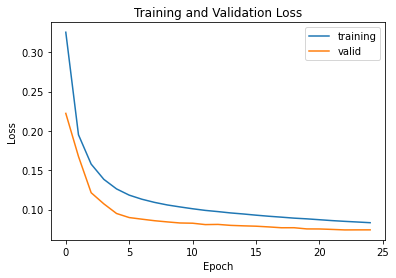

In [48]:
plt.plot(history.history['loss'], label='training') 
plt.plot(history.history['val_loss'], label = 'valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After everything settled down, I started with the recurrent neural network baseline trying to predict. The basic recurrent neural network with one layer and one dense has about 0.07 validation loss and 89% r^2, which the performance plot has shown at the right. Even though the RNN baseline model with the very baseline performs pretty well and the final training result and the validation result are pretty close, it still shows some underfitting and the training loss could be lower.

#### add CNN on LSTM

In [81]:
model = models.Sequential()
# Shape [batch, time, features] => [batch, time, lstm_units]
model.add(layers.Conv1D(filters=64, kernel_size = 3, activation='relu'))
model.add(layers.LSTM(64, return_sequences=False))
# Shape => [batch, time, features]
model.add(layers.Dense(units=1))

In [82]:
history = compile_and_fit(model, window_5_1_2)

Epoch 1/100
1080/1080 [==============================] - 5s 3ms/step - loss: 0.2778 - mean_absolute_error: 0.3751 - RSquared: 0.6309 - val_loss: 0.1614 - val_mean_absolute_error: 0.2914 - val_RSquared: 0.7443
Epoch 2/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1614 - mean_absolute_error: 0.2738 - RSquared: 0.7922 - val_loss: 0.1187 - val_mean_absolute_error: 0.2504 - val_RSquared: 0.8133
Epoch 3/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1344 - mean_absolute_error: 0.2441 - RSquared: 0.8284 - val_loss: 0.0930 - val_mean_absolute_error: 0.2189 - val_RSquared: 0.8568
Epoch 4/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1214 - mean_absolute_error: 0.2293 - RSquared: 0.8463 - val_loss: 0.0861 - val_mean_absolute_error: 0.2094 - val_RSquared: 0.8658
Epoch 5/100
1080/1080 [==============================] - 4s 3ms/step - loss: 0.1142 - mean_absolute_error: 0.2207 - RSquared: 0.8562 - val_loss: 0.0839 - val_mean_a

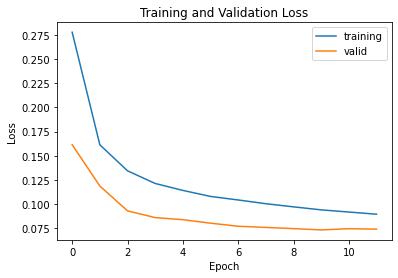

In [83]:
plt.plot(history.history['loss'], label='training') 
plt.plot(history.history['val_loss'], label = 'valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the class material, I learned that RNN/LSTM is suitable for dealing with the sequences dataset by treating the data with a 3D shape. CNN is good with digging the spatial correlation from the dataset and treating data as 3D. By combined these two methods, it can help to improve the performance of predicting. After trying the recurrent neural network baseline, I added a 1D convolutional neural network layer into the original model to extract features and used RNN dense layer as the last layer to analyze the features across the consequence time steps, which is suitable for this dataset situation. Form the performance plot which shown at the right, we can found the validation loss is still around 0.08 and 87% r^2.

#### RNN with tuning parameters

In [64]:
#LSTM model, MAE:0.0525
model = models.Sequential()
model.add(layers.LSTM(64, return_sequences=True,recurrent_dropout = 0.1))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(32, return_sequences=False,recurrent_dropout = 0.1))
model.add(layers.Dense(units=1))

In [65]:
print('Input shape:', window_5_1_2.example[0].shape)
print('Output shape:', model(window_5_1_2.example[0]).shape)

Input shape: (32, 5, 32)
Output shape: (32, 1)


In [66]:
history = compile_and_fit(model, window_5_1_2)

Epoch 1/100
1080/1080 [==============================] - 11s 7ms/step - loss: 0.3081 - mean_absolute_error: 0.3982 - RSquared: 0.5902 - val_loss: 0.1758 - val_mean_absolute_error: 0.3101 - val_RSquared: 0.7198
Epoch 2/100
1080/1080 [==============================] - 8s 8ms/step - loss: 0.1831 - mean_absolute_error: 0.2969 - RSquared: 0.7620 - val_loss: 0.1288 - val_mean_absolute_error: 0.2627 - val_RSquared: 0.8063
Epoch 3/100
1080/1080 [==============================] - 7s 7ms/step - loss: 0.1523 - mean_absolute_error: 0.2665 - RSquared: 0.8029 - val_loss: 0.1018 - val_mean_absolute_error: 0.2305 - val_RSquared: 0.8427
Epoch 4/100
1080/1080 [==============================] - 8s 7ms/step - loss: 0.1349 - mean_absolute_error: 0.2477 - RSquared: 0.8265 - val_loss: 0.0919 - val_mean_absolute_error: 0.2156 - val_RSquared: 0.8594
Epoch 5/100
1080/1080 [==============================] - 8s 7ms/step - loss: 0.1233 - mean_absolute_error: 0.2351 - RSquared: 0.8410 - val_loss: 0.0864 - val_mean_

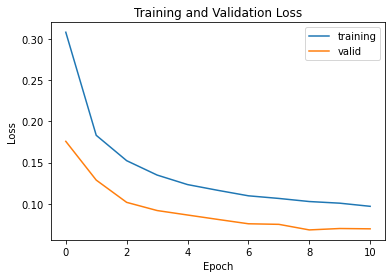

In [67]:
plt.plot(history.history['loss'], label='training') 
plt.plot(history.history['val_loss'], label = 'valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

I also tried changing the batch size to 64 and 240, trying to control the training case into the network before the weight got updated, which can help improve the performance. After comparing the results, size 64 performance was the best. After trying different batch sizes, I added recurrent dropout = 0.1 and changed the number of epochs. The performance improved slightly with 0.068 validation loss, 0.0525 MAE, and 89% r^2. 

#### Bidirectional - best model for Kaggle

In [56]:
#Bidirectional/ ,MAE:0.0571
model = models.Sequential()
# Shape [batch, time, features] => [batch, time, lstm_units]
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True,recurrent_dropout = 0.1)))
model.add(layers.LSTM(64))
model.add(layers.Dense(units = 32))
model.add(layers.Dense(units=1))

In [57]:
print('Input shape:', window_5_1_2.example[0].shape)
print('Output shape:', model(window_5_1_2.example[0]).shape)

Input shape: (32, 5, 32)
Output shape: (32, 1)


In [58]:
history = compile_and_fit(model, window_5_1_2)

Epoch 1/100
1080/1080 [==============================] - 12s 7ms/step - loss: 0.2667 - mean_absolute_error: 0.3664 - RSquared: 0.6489 - val_loss: 0.1454 - val_mean_absolute_error: 0.2807 - val_RSquared: 0.7792
Epoch 2/100
1080/1080 [==============================] - 7s 7ms/step - loss: 0.1547 - mean_absolute_error: 0.2658 - RSquared: 0.8013 - val_loss: 0.1141 - val_mean_absolute_error: 0.2350 - val_RSquared: 0.8272
Epoch 3/100
1080/1080 [==============================] - 8s 7ms/step - loss: 0.1305 - mean_absolute_error: 0.2403 - RSquared: 0.8339 - val_loss: 0.0978 - val_mean_absolute_error: 0.2185 - val_RSquared: 0.8519
Epoch 4/100
1080/1080 [==============================] - 7s 7ms/step - loss: 0.1189 - mean_absolute_error: 0.2279 - RSquared: 0.8496 - val_loss: 0.0850 - val_mean_absolute_error: 0.2034 - val_RSquared: 0.8708
Epoch 5/100
1080/1080 [==============================] - 8s 7ms/step - loss: 0.1113 - mean_absolute_error: 0.2191 - RSquared: 0.8597 - val_loss: 0.0829 - val_mean_

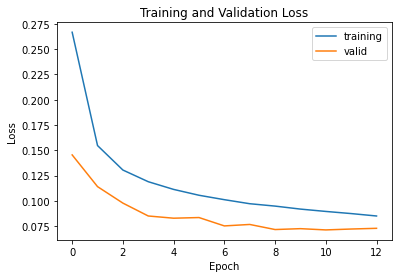

In [59]:
plt.plot(history.history['loss'], label='training') 
plt.plot(history.history['val_loss'], label = 'valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After changing the tuning parameters, I tried bidirectional RNNs, which combined two RNN models with size 64 as the batch sizes, 0.1 dropout, and one more dense layer. One LSTM layer is for moving forward to the sequences dataset, and another RNN model is for moving backward. The mean absolute error is around 0.0571, and the r^2 is about 0.90. I also used this model to predict the result for Kaggle, with about 806 score.

### convert result and save into file

In [86]:
def prediction(model):
    prediction = model.predict(window_5_1_2.test)
    #prediction = convertbackscaler.inverse_transform(prediction)
    predictions = [(i * train_volumn_std) + train_volumn_mean for i in prediction]
    
    df = pd.DataFrame(predictions, columns = ['prediction'])
    id = []
    for i in range(len(df)):
        id.append(i+1)    
    df.insert(loc=0, column = 'id',value = id)
    
    #save to csv file
    df.to_csv('prediction.csv', index = False)


In [87]:
prediction(model)